In [1]:
import os
import sys
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

sys.path.append('..')
import catrace
import catrace.scale as catscale
import catrace.process_time_trace as ptt
import catrace.exp_collection as ecl
import catrace.cluster as caclust
import dataset_param as dtpar

In [2]:
region = 'Dp'
separate_region = False
if separate_region:
    all_dfovf_select = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_dfovf_select.pkl'))
    all_dfovf_select_rg = all_dfovf_select.xs(region, level='region', axis=1)
    all_dfovf_select_rg.to_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))

In [3]:
compute_response = False
if compute_response:
    all_dfovf_select_rg = pd.read_pickle(os.path.join(dtpar.db_dir, f'all_dfovf_select_{region}.pkl'))
    if region =='OB':
        time_window = [5.5,11]
    else:
        time_window = [5,7]   
    frame_rate = 30/4
    all_response = ptt.mean_pattern_in_time_window(all_dfovf_select_rg, time_window, frame_rate)
    all_response.to_pickle(os.path.join(dtpar.db_dir, f'all_response_select_{region}.pkl'))
    all_response

In [4]:
all_response = pd.read_pickle(os.path.join(dtpar.db_dir, 'all_response_select_{}.pkl'.format(region)))
all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                  0.000200  0.209071  0.492094  0.474856 -0.013714   
      1                  0.243173 -0.022423  0.559050  0.397474  0.015055   
      2                  0.036004  0.048652  0.147587 -0.068843 -0.078841   
trp   0                 -0.020108  0.409061 -0.034526  0.172329  0.252261   
      1                  0.098764  0.288644  0.048206  0.129740  0.178743   
      2                  0.118979  0.330661 -0.034567 -0.066544  0.074195   
arg   0                  0.043738  0.141261 -0.030435  0.065854  0.461075   
      1                  0.069129  0.117999  0.238499  0.419269  0.127385   
      2                  0.017971  0.179629  0.189134  0.373900 -0.084077   
tdca  0                  0.055465  0.117861  0.071263 -0.057732  0.127823   
      1                  0.021753  0.089649 -0.086117 -0.004822 -0.021328   
      2                  0.075765  0.177125 -0.023670  0.316943  0.012088   
tca   0                  0.029793  0.113502  0.041647  0.120897  0.015454   
      1                  0.061789  0.046316  0.015583  0.064048  0.133865   
      2                  0.094398  0.015964 -0.001715 -0.047148  0.029763   
gca   0                 -0.062147 -0.072202 -0.056622  0.064611  0.056811   
      1                 -0.312422  0.081823  0.070302 -0.062725 -0.037224   
      2                  0.003238  0.111933  0.087542 -0.111042 -0.096473   
acsf  0                  0.129578  0.067252  0.113606  0.020651 -0.075632   
      1                  0.106135 -0.073797  0.018098  0.075378  0.125090   
      2                  0.164553  0.118102  0.104945  0.196501 -0.006301   
spont 0                  0.003318  0.107230  0.016274  0.087140  0.012023   
      1                  0.012960  0.026936 -0.073952 -0.121734 -0.027901   
      2                 -0.039621  0.006412 -0.098490 -0.204592  0.037356   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.024605 -0.074521  0.092936 -0.007029 -0.020326  ...   
      1      0.074823 -0.010026  0.089967  0.020651 -0.006347  ...   
      2      0.151725 -0.014862  0.169540  0.140089  0.169556  ...   
trp   0      0.129817 -0.032269  0.094983  0.094825  0.048034  ...   
      1      0.128250  0.042115 -0.102639  0.068903  0.016555  ...   
      2     -0.059373  0.075893  0.065007  0.023148  0.116972  ...   
arg   0      0.033696  0.019058  0.010971  0.049436 -0.005199  ...   
      1      0.316417  0.155094 -0.021431  0.130642 -0.053902  ...   
      2     -0.059250  0.010679 -0.005548  0.056502  0.068987  ...   
tdca  0     -0.077840 -0.020798  0.098266  0.109144  0.045656  ...   
      1     -0.067299  0.038679 -0.030768  0.132517 -0.008783  ...   
      2     -0.078445  0.103355  0.056961 -0.014215  0.160220  ...   
tca   0     -0.133252  0.088258 -0.044862 -0.038487 -0.018844  ...   
      1      0.051403  0.103149  0.100475 -0.043041  0.059922  ...   
      2     -0.042293  0.114024  0.019450  0.101233  0.048663  ...   
gca   0      0.031446  0.085682 -0.075024 -0.078493 -0.037200  ...   
      1     -0.103984 -0.015952 -0.051851  0.009455 -0.064217  ...   
      2     -0.009670  0.017204  0.094498  0.088863 -0.051786  ...   
acsf  0      0.079401  0.060205  0.111486  0.047103 -0.052355  ...   
      1     -0.002489  0.144969  0.066520 -0.048894 -0.017864  ...   
      2      0.0

In [757]:
# Remove spont and ACSF odors
remove_control_odor = False
remove_odors = ['tca','tdca', 'gca','acsf', 'spont']
if remove_control_odor:
    all_response = all_response.drop(remove_odors, level=0, axis=0)

In [758]:
# Remvome first trial
remove_first_trial = False
if remove_first_trial:
    responses.drop([0], inplace=True, axis=0, level=1)
    responses.index.remove_unused_levels().levels[0]
    responses

In [759]:
# Average all trials
avg_trials = False
if avg_trials:
    responses = responses.groupby(level=0).mean()
    responses['trial'] = 0
    responses.set_index('trial', append=True, inplace=True)
    responses = responses.reindex(dtpar.odor_list, level='odor')
responses

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                 -0.398815  0.869787  2.614093  2.084132 -0.529511   
      1                  2.055415 -1.159753  3.032630  1.661676 -0.293125   
      2                 -0.037170 -0.536624  0.460582 -0.884100 -1.064649   
trp   0                 -0.603946  2.623124 -0.677807  0.432537  1.655945   
      1                  0.596759  1.567418 -0.160650  0.200028  1.051865   
      2                  0.800952  1.935785 -0.678060 -0.871551  0.192815   
arg   0                  0.040956  0.275287 -0.652233 -0.148749  3.371722   
      1                  0.297422  0.071348  1.028874  1.780663  0.629866   
      2                 -0.219310  0.611662  0.720293  1.532981 -1.107670   
tdca  0                  0.159409  0.070137 -0.016520 -0.823443  0.633460   
      1                 -0.181114 -0.177198 -1.000302 -0.534589 -0.592074   
      2                  0.364456  0.589711 -0.609947  1.222031 -0.317504   
tca   0                 -0.099908  0.031925 -0.201649  0.151749 -0.289846   
      1                  0.223279 -0.557103 -0.364573 -0.158606  0.683107   
      2                  0.552657 -0.823204 -0.472705 -0.765663 -0.172273   
gca   0                 -1.028570 -1.596167 -0.815928 -0.155534  0.049975   
      1                 -3.556558 -0.245811 -0.022526 -0.850704 -0.722693   
      2                 -0.368130  0.018168  0.085239 -1.114482 -1.209530   
acsf  0                  0.908004 -0.373558  0.248167 -0.395524 -1.038278   
      1                  0.671219 -1.610156 -0.348855 -0.096754  0.611007   
      2                  1.261289  0.072252  0.194029  0.564499 -0.468600   
spont 0                 -0.367323 -0.023068 -0.360253 -0.032542 -0.318036   
      1                 -0.269930 -0.727010 -0.924256 -1.172854 -0.646089   
      2                 -0.801044 -0.906953 -1.077644 -1.625202 -0.109883   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.409246 -2.018238  0.735979 -0.552843 -0.562676  ...   
      1      0.584434 -0.895542  0.693371 -0.136957 -0.364853  ...   
      2      1.352988 -0.979719  1.835481  1.657513  2.124436  ...   
trp   0      1.134037 -1.282730  0.765367  0.977451  0.404720  ...   
      1      1.118384  0.012115 -2.071117  0.588001 -0.040749  ...   
      2     -0.756713  0.600108  0.335116 -0.099450  1.380289  ...   
arg   0      0.173414 -0.389245 -0.440472  0.295521 -0.348604  ...   
      1      2.998905  1.978808 -0.905528  1.515590 -1.037822  ...   
      2     -0.755487 -0.535118 -0.677560  0.401683  0.701233  ...   
tdca  0     -0.941267 -1.083053  0.812489  1.192589  0.371072  ...   
      1     -0.835922 -0.047702 -1.039542  1.543760 -0.399320  ...   
      2     -0.947320  1.078161  0.219630 -0.660801  1.992307  ...   
tca   0     -1.495054  0.815361 -1.241840 -1.025470 -0.541704  ...   
      1      0.350372  1.074567  0.844189 -1.093895  0.572948  ...   
      2     -0.586020  1.263876 -0.318765  1.073727  0.413627  ...   
gca   0      0.150926  0.770514 -1.674763 -1.626543 -0.801461  ...   
      1     -1.202556 -0.998689 -1.342149 -0.305174 -1.183784  ...   
      2     -0.259987 -0.421525  0.758400  0.887875 -1.007870  ...   
acsf  0      0.630183  0.327017  1.002238  0.260455 -1.015927  ...   
      1     -0.188221  1.802557  0.356839 -1.181836 -0.527833  ...   
      2      0.3

In [5]:
# Scale responses
responses = catscale.standard_scale(all_response)
responses

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        1         2         3         4         6     
odor  trial                                                                 
phe   0                 -0.398815  0.869787  2.614093  2.084132 -0.529511   
      1                  2.055415 -1.159753  3.032630  1.661676 -0.293125   
      2                 -0.037170 -0.536624  0.460582 -0.884100 -1.064649   
trp   0                 -0.603946  2.623124 -0.677807  0.432537  1.655945   
      1                  0.596759  1.567418 -0.160650  0.200028  1.051865   
      2                  0.800952  1.935785 -0.678060 -0.871551  0.192815   
arg   0                  0.040956  0.275287 -0.652233 -0.148749  3.371722   
      1                  0.297422  0.071348  1.028874  1.780663  0.629866   
      2                 -0.219310  0.611662  0.720293  1.532981 -1.107670   
tdca  0                  0.159409  0.070137 -0.016520 -0.823443  0.633460   
      1                 -0.181114 -0.177198 -1.000302 -0.534589 -0.592074   
      2                  0.364456  0.589711 -0.609947  1.222031 -0.317504   
tca   0                 -0.099908  0.031925 -0.201649  0.151749 -0.289846   
      1                  0.223279 -0.557103 -0.364573 -0.158606  0.683107   
      2                  0.552657 -0.823204 -0.472705 -0.765663 -0.172273   
gca   0                 -1.028570 -1.596167 -0.815928 -0.155534  0.049975   
      1                 -3.556558 -0.245811 -0.022526 -0.850704 -0.722693   
      2                 -0.368130  0.018168  0.085239 -1.114482 -1.209530   
acsf  0                  0.908004 -0.373558  0.248167 -0.395524 -1.038278   
      1                  0.671219 -1.610156 -0.348855 -0.096754  0.611007   
      2                  1.261289  0.072252  0.194029  0.564499 -0.468600   
spont 0                 -0.367323 -0.023068 -0.360253 -0.032542 -0.318036   
      1                 -0.269930 -0.727010 -0.924256 -1.172854 -0.646089   
      2                 -0.801044 -0.906953 -1.077644 -1.625202 -0.109883   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            7         8         12        17        22   ...   
odor  trial                                                    ...   
phe   0     -0.409246 -2.018238  0.735979 -0.552843 -0.562676  ...   
      1      0.584434 -0.895542  0.693371 -0.136957 -0.364853  ...   
      2      1.352988 -0.979719  1.835481  1.657513  2.124436  ...   
trp   0      1.134037 -1.282730  0.765367  0.977451  0.404720  ...   
      1      1.118384  0.012115 -2.071117  0.588001 -0.040749  ...   
      2     -0.756713  0.600108  0.335116 -0.099450  1.380289  ...   
arg   0      0.173414 -0.389245 -0.440472  0.295521 -0.348604  ...   
      1      2.998905  1.978808 -0.905528  1.515590 -1.037822  ...   
      2     -0.755487 -0.535118 -0.677560  0.401683  0.701233  ...   
tdca  0     -0.941267 -1.083053  0.812489  1.192589  0.371072  ...   
      1     -0.835922 -0.047702 -1.039542  1.543760 -0.399320  ...   
      2     -0.947320  1.078161  0.219630 -0.660801  1.992307  ...   
tca   0     -1.495054  0.815361 -1.241840 -1.025470 -0.541704  ...   
      1      0.350372  1.074567  0.844189 -1.093895  0.572948  ...   
      2     -0.586020  1.263876 -0.318765  1.073727  0.413627  ...   
gca   0      0.150926  0.770514 -1.674763 -1.626543 -0.801461  ...   
      1     -1.202556 -0.998689 -1.342149 -0.305174 -1.183784  ...   
      2     -0.259987 -0.421525  0.758400  0.887875 -1.007870  ...   
acsf  0      0.630183  0.327017  1.002238  0.260455 -1.015927  ...   
      1     -0.188221  1.802557  0.356839 -1.181836 -0.527833  ...   
      2      0.3

In [18]:
importlib.reload(caclust)
# Compute cluster labels
labels = caclust.compute_cluster(responses, k=40)

Finding 40 nearest neighbors using minkowski metric and 'auto' algorithm


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Neighbors computed in 4.761404514312744 seconds
Jaccard graph constructed in 0.9854135513305664 seconds
Wrote graph to binary file in 0.18892145156860352 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.671487
After 2 runs, maximum modularity is Q = 0.673881
After 13 runs, maximum modularity is Q = 0.675132
After 18 runs, maximum modularity is Q = 0.676723
Louvain completed 38 runs in 9.75618577003479 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 15.812857627868652 seconds


In [19]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
cluster_df = caclust.get_cluster_df(all_response, labels)
cluster_df

(phe, 0)  (phe, 1)  (phe, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1       0.000200  0.243173  0.036004   
2021-09-04-DpOBEM-JH18 arg-phe 1     8       0.070309  0.080982  0.043853   
                                     32      0.059300  0.018160 -0.029221   
                                     49      0.134546 -0.032040 -0.034540   
                                     70      0.182696  0.094006  0.098968   
...                                               ...       ...       ...   
2022-02-13-DpOBEM-N10  naive   0     3       0.002970  0.232089  0.212689   
2021-12-10-DpOBEM-N4   naive   3     240     0.063168  0.222115  0.222669   
2021-12-31-DpOBEM-N7   naive   0     42      0.061602 -0.024618  0.113603   
2022-02-13-DpOBEM-N10  naive   0     25      0.029410  0.189890  0.234914   
                                     32     -0.053700  0.251351  0.167471   

                                             (trp, 0)  (trp, 1)  (trp, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1      -0.020108  0.098764  0.118979   
2021-09-04-DpOBEM-JH18 arg-phe 1     8       0.039111 -0.025659 -0.094492   
                                     32      0.051763 -0.004970 -0.087752   
                                     49     -0.084268  0.026391 -0.025056   
                                     70      0.179097  0.008787  0.019069   
...                                               ...       ...       ...   
2022-02-13-DpOBEM-N10  naive   0     3      -0.008264  0.049491  0.098381   
2021-12-10-DpOBEM-N4   naive   3     240    -0.163914 -0.007568 -0.085354   
2021-12-31-DpOBEM-N7   naive   0     42      0.124454  0.014562  0.017056   
2022-02-13-DpOBEM-N10  naive   0     25     -0.068361  0.019481  0.103661   
                                     32      0.055264 -0.036383 -0.072376   

                                             (arg, 0)  (arg, 1)  (arg, 2)  \
fish_id                cond    plane neuron                                 
2021-02-05-DpOBEM-JH9  phe-arg 0     1       0.043738  0.069129  0.017971   
2021-09-04-DpOBEM-JH18 arg-phe 1     8       0.054429  0.136575  0.205836   
                                     32      0.164514  0.035205 -0.014070   
                                     49      0.063719  0.000278  0.032259   
                                     70      0.070650  0.224584  0.045164   
...                                               ...       ...       ...   
2022-02-13-DpOBEM-N10  naive   0     3       0.071187  0.034100 -0.015477   
2021-12-10-DpOBEM-N4   naive   3     240    -0.112259  0.029051  0.128906   
2021-12-31-DpOBEM-N7   naive   0     42      0.062321  0.066667  0.009798   
2022-02-13-DpOBEM-N10  naive   0     25      0.103970 -0.095997 -0.087370   
                                     32      0.097876  0.091073  0.021515   

                                             (tdca, 0)  ...  (gca, 0)  \
fish_id                cond    plane neuron             ...             
2021-02-05-DpOBEM-JH9  phe-arg 0     1        0.055465  ... -0.062147   
2021-09-04-DpOBEM-JH18 arg-phe 1     8        0.059087  ... -0.043972   
                                     32      -0.012713  ... -0.034688   
                                     49      -0.036221  ... -0.013452   
                                     70      -0.144485  ...  0.045778   
...                                                ...  ...       ...   
2022-02-13-DpOBEM-N10  naive   0     3       -0.083593  ... -0.034451   
2021-12-10-DpOBEM-N4   naive   3     240      0.355752  ... -0.082059   
2021-12-31-DpOBEM-N7   naive   0     42       0.105817  ...  0.102235   
2022-02-13-DpOBEM-N10  naive   0     25       0.019106  ... -0.020645   
                                     32      -0.038335  ...  0.164642   

                                             (gca, 1)  (gca, 2)  (acsf, 0)  \
fish_id    

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


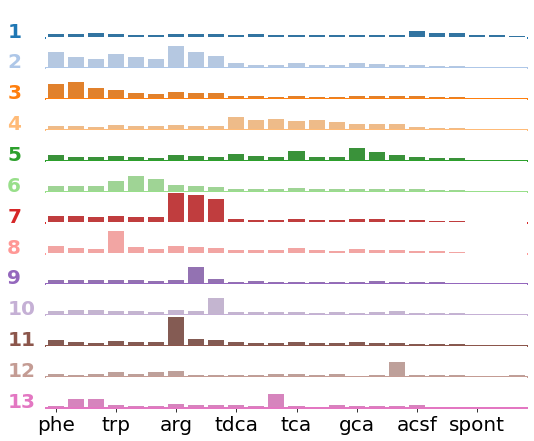

In [35]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
cluster_mean_df = caclust.get_cluster_mean_df(cluster_df)
fig = caclust.plot_cluster_tuning(cluster_mean_df, cmap=cluster_cmap)
fig_dir = dtpar.fig_dir
# fig.savefig(os.path.join(fig_dir, f"cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-01 U_stat=2.400e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=2.500e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-01 U_stat=2.400e+01
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-03 U_stat=3.800e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:9.433e-01 U_stat=2.100e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.222e-01 U_stat=1.100e+01
12.0_arg-phe vs. 12.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.716e-01 U_stat=1.200e+01
13.0_arg-phe vs. 13.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.429e-01 U_stat=1.100e+01
3.0_phe-trp

9.0_phe-arg vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.931e-02 U_stat=4.400e+01
4.0_arg-phe vs. 4.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.865e-03 U_stat=4.000e+00
9.0_arg-phe vs. 9.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:3.792e-02 U_stat=5.200e+01


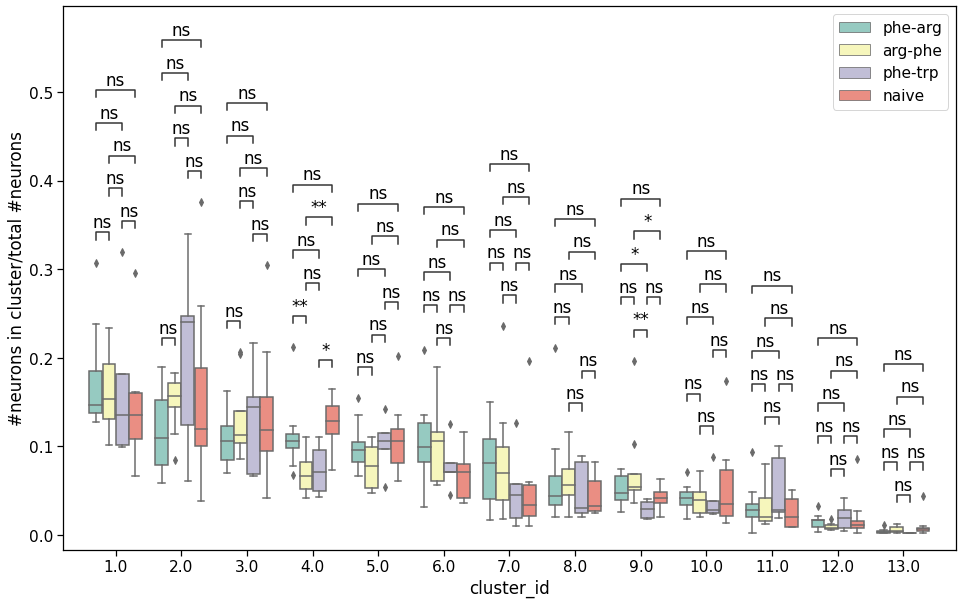

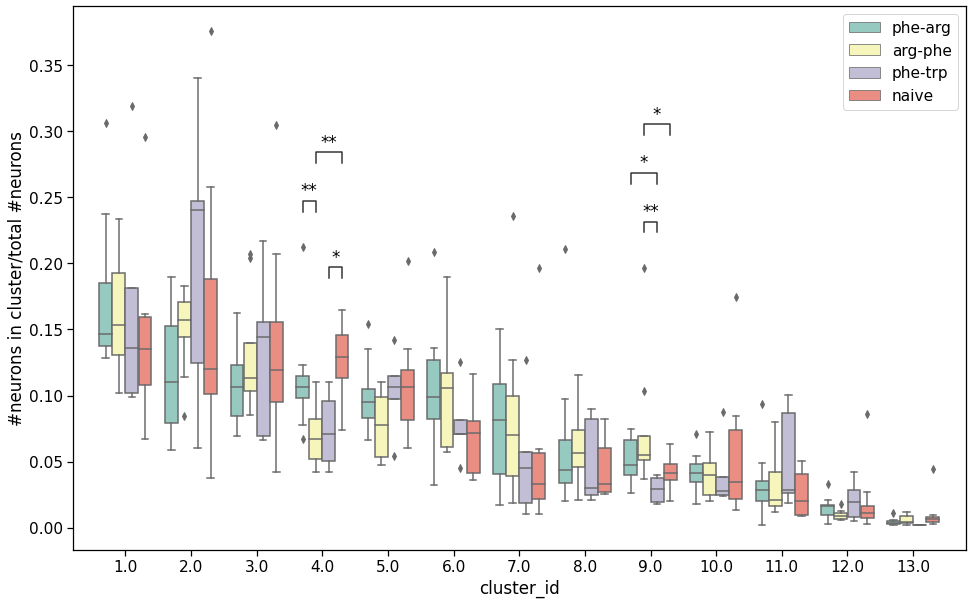

In [21]:
importlib.reload(caclust)
cluster_nrn_df = caclust.get_cluster_nrn_df(cluster_df)

selected_clusters = None
#selected_clusters = np.array([2,4,5,6,8,9,10,11])
# TODO function for select a.a. tuned neurons 
if selected_clusters is not None:
    cluster_nrn_df = cluster_nrn_df[cluster_nrn_df.cluster_id.isin(selected_clusters)]

cluster_count_df = caclust.get_cluster_count_df(cluster_nrn_df, dtpar.cond_list)

#cluster_count_df.to_csv('/media/hubo/WD_BoHu/temp_backup/cluster_count_df.csv')

importlib.reload(caclust)
cluster_ids = cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, cluster_ids)

importlib.reload(caclust)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
#fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}.svg"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

arg-phe vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-03 U_stat=3.800e+01
phe-arg vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.931e-02 U_stat=4.400e+01
arg-phe vs. naive: Mann-Whitney-Wilcoxon test two-sided, P_val:3.792e-02 U_stat=5.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

phe-arg vs. arg-phe: Mann-Whitney-Wilcoxon test two-sided, P_val:8.547e-03 U_stat=6.900e+01
phe-trp vs. naive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.088e-02 U_stat=3.000e+00
arg-phe vs. naive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.865e-03 U_stat=4.000e+00


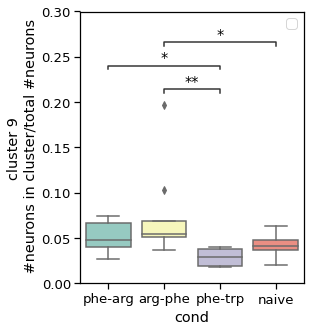

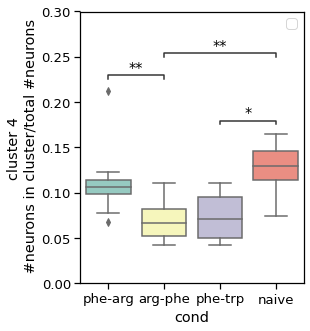

In [22]:
importlib.reload(caclust)
cluster_ids = set([x[0][0] for x in new_pairs])

# subset_cluster_count_df = cluster_count_df[cluster_count_df.cluster_id.isin(cluster_ids)] # choose subset of clusters for plotting


for cluster_id in cluster_ids:
    subset_cluster_count_df = cluster_count_df[cluster_count_df.cluster_id == cluster_id]
    pairs = [p for p in new_pairs if p[0][0] == cluster_id]
    annotator, fig = caclust.plot_single_cluster_cont_with_stat(subset_cluster_count_df, dtpar.cond_list,
                                                                 test_method=test_method, 
                                                                 figsize=(4,5), ylim=(0,0.3))

#fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}_subset.svg"))

In [23]:
ba_clusters = [1,3]
aa_all_response = all_response.loc[:,~cluster_df.cluster_id.isin(ba_clusters)]
aa_all_response

fish_id     2021-02-05-DpOBEM-JH9                                          \
cond                      phe-arg                                           
plane                           0                                           
neuron                        2         4         6         7         17    
odor  trial                                                                 
phe   0                  0.209071  0.474856 -0.013714 -0.024605 -0.007029   
      1                 -0.022423  0.397474  0.015055  0.074823  0.020651   
      2                  0.048652 -0.068843 -0.078841  0.151725  0.140089   
trp   0                  0.409061  0.172329  0.252261  0.129817  0.094825   
      1                  0.288644  0.129740  0.178743  0.128250  0.068903   
      2                  0.330661 -0.066544  0.074195 -0.059373  0.023148   
arg   0                  0.141261  0.065854  0.461075  0.033696  0.049436   
      1                  0.117999  0.419269  0.127385  0.316417  0.130642   
      2                  0.179629  0.373900 -0.084077 -0.059250  0.056502   
tdca  0                  0.117861 -0.057732  0.127823 -0.077840  0.109144   
      1                  0.089649 -0.004822 -0.021328 -0.067299  0.132517   
      2                  0.177125  0.316943  0.012088 -0.078445 -0.014215   
tca   0                  0.113502  0.120897  0.015454 -0.133252 -0.038487   
      1                  0.046316  0.064048  0.133865  0.051403 -0.043041   
      2                  0.015964 -0.047148  0.029763 -0.042293  0.101233   
gca   0                 -0.072202  0.064611  0.056811  0.031446 -0.078493   
      1                  0.081823 -0.062725 -0.037224 -0.103984  0.009455   
      2                  0.111933 -0.111042 -0.096473 -0.009670  0.088863   
acsf  0                  0.067252  0.020651 -0.075632  0.079401  0.047103   
      1                 -0.073797  0.075378  0.125090 -0.002489 -0.048894   
      2                  0.118102  0.196501 -0.006301  0.051380 -0.017184   
spont 0                  0.107230  0.087140  0.012023 -0.102100 -0.016987   
      1                  0.026936 -0.121734 -0.027901  0.041594 -0.004977   
      2                  0.006412 -0.204592  0.037356  0.062911 -0.088795   

fish_id                                                        ...  \
cond                                                           ...   
plane                                                          ...   
neuron            22        26        32        36        37   ...   
odor  trial                                                    ...   
phe   0     -0.020326 -0.045851  0.089206  0.037157  0.024350  ...   
      1     -0.006347  0.026551  0.126616 -0.017980  0.141401  ...   
      2      0.169556  0.095176 -0.001640  0.069269  0.073322  ...   
trp   0      0.048034  0.040427  0.200566  0.089864  0.082157  ...   
      1      0.016555  0.069193  0.054560  0.148424  0.195101  ...   
      2      0.116972  0.073263  0.084601  0.110752 -0.036682  ...   
arg   0     -0.005199  0.037427  0.175038 -0.018681  0.009572  ...   
      1     -0.053902  0.076538  0.031451  0.110894 -0.006553  ...   
      2      0.068987  0.119508  0.052447  0.036314  0.037598  ...   
tdca  0      0.045656 -0.023496  0.253218  0.070022  0.180737  ...   
      1     -0.008783  0.107919  0.041360  0.028772  0.077010  ...   
      2      0.160220  0.045252  0.098446  0.025550  0.018367  ...   
tca   0     -0.018844  0.065705  0.210230 -0.012635  0.037157  ...   
      1      0.059922  0.017009  0.186984  0.001169  0.095233  ...   
      2      0.048663  0.112927 -0.056450  0.007225 -0.022677  ...   
gca   0     -0.037200 -0.080245  0.037701  0.059076 -0.088249  ...   
      1     -0.064217 -0.036071  0.022808  0.099494  0.103012  ...   
      2     -0.051786  0.091329 -0.039560  0.103673  0.016905  ...   
acsf  0     -0.052355  0.055545 -0.046244  0.084063  0.108908  ...   
      1     -0.017864  0.105419  0.073131  0.087458  0.072416  ...   
      2     -0.0

In [24]:
# Remove spont and ACSF odors
remove_control_ba = True
remove_odors = ['tca','tdca', 'gca','acsf', 'spont']
if remove_control_ba:
    aa_all_response = aa_all_response.drop(remove_odors, level=0, axis=0)

In [25]:
# Remvome first trial
aa_remove_first_trial = True
if aa_remove_first_trial:
    aa_all_response.drop([0], inplace=True, axis=0, level=1)
    aa_all_response.index.remove_unused_levels().levels[0] 

In [26]:
# Average all trials
avg_trials = True
if avg_trials:
    aa_all_response = aa_all_response.groupby(level=0).mean()
    aa_all_response['trial'] = 0
    aa_all_response.set_index('trial', append=True, inplace=True)
    aa_all_response = aa_all_response.reindex(dtpar.odor_list, level='odor')
aa_all_response

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       2         4         6         7         17    
odor trial                                                                 
phe  0                  0.013115  0.164316 -0.031893  0.113274  0.080370   
trp  0                  0.309653  0.031598  0.126469  0.034439  0.046026   
arg  0                  0.148814  0.396585  0.021654  0.128583  0.093572   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           22        26        32        36        37   ...   
odor trial                                                    ...   
phe  0      0.081604  0.060863  0.062488  0.025644  0.107361  ...   
trp  0      0.066763  0.071228  0.069580  0.129588  0.079210  ...   
arg  0      0.007542  0.098023  0.041949  0.073604  0.015523  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       317       345       360       385       390   
odor trial                                                                 
phe  0                 -0.031260  0.280555  0.047211  0.181674  0.089723   
trp  0                  0.097754  0.260040  0.008649  0.119114  0.133373   
arg  0                 -0.005015  0.185442  0.071122  0.275475  0.181654   

fish_id                                                       
cond                                                          
plane                                                         
neuron           405       413       417       435       439  
odor trial                                                    
phe  0      0.055796  0.082254 -0.047035 -0.081840  0.096606  
trp  0      0.166663  0.064738  0.185285 -0.002312 -0.021903  
arg  0      0.082120  0.030798  0.077364 -0.009396  0.191154  

[3 rows x 11277 columns]

In [27]:
# Scale responses
aa_do_scale = True
if aa_do_scale:
    aa_responses = catscale.standard_scale(aa_all_response)
else:
    aa_response = aa_all_response

/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [795]:
aa_responses

fish_id    2021-02-05-DpOBEM-JH9                                          \
cond                     phe-arg                                           
plane                          0                                           
neuron                       2         3         4         6         7     
odor trial                                                                 
phe  0                 -1.188712  1.138046 -0.219991 -1.073980  0.513368   
trp  0                  1.257849 -1.296098 -1.099840  1.333812 -1.397885   
arg  0                 -0.069138  0.158052  1.319832 -0.259832  0.884517   

fish_id                                                       ...  \
cond                                                          ...   
plane                                                         ...   
neuron           22        26        32        33        35   ...   
odor trial                                                    ...   
phe  0      0.926245 -1.011794  0.382542 -0.454114  0.054154  ...   
trp  0      0.462379 -0.349793  0.987816  1.386943  1.196770  ...   
arg  0     -1.388624  1.361587 -1.370358 -0.932829 -1.250923  ...   

fish_id    2022-02-20-DpOBEM-N11                                          \
cond                       naive                                           
plane                          3                                           
neuron                       216       238       319       350       368   
odor trial                                                                 
phe  0                 -0.419804  0.603749  1.118786  0.931304 -1.135269   
trp  0                  1.379442 -1.409401 -1.308552 -1.387338  1.297959   
arg  0                 -0.959638  0.805652  0.189766  0.456034 -0.162690   

fish_id                                                       
cond                                                          
plane                                                         
neuron           405       415       419       439       448  
odor trial                                                    
phe  0     -0.966904 -0.920840  1.199989  0.091636  0.834825  
trp  0      1.377221  1.389958  0.048094 -1.267989  0.571173  
arg  0     -0.410317 -0.469118 -1.248083  1.176353 -1.405998  

[3 rows x 10199 columns]

In [28]:
importlib.reload(caclust)
# Compute cluster labels
aa_labels = caclust.compute_cluster(aa_responses, k=320)

Finding 320 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.19677066802978516 seconds


/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/home/hubo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Jaccard graph constructed in 32.49414873123169 seconds
Wrote graph to binary file in 0.8423190116882324 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.855864
Louvain completed 21 runs in 9.174373626708984 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 43.03537440299988 seconds


In [29]:
# Put cluster IDs into the data frame
importlib.reload(caclust)
aa_cluster_df = caclust.get_cluster_df(aa_all_response, aa_labels)
aa_cluster_df

(phe, 0)  (trp, 0)  (arg, 0)  \
fish_id                cond    plane neuron                                 
2021-04-02-DpOBEM-JH11 phe-arg 2     505    -0.009196  0.049808  0.025417   
2021-11-26-DpOBEM-JH24 phe-trp 1     251     0.279976  0.335256  0.310014   
2021-07-15-DpOBEM-N2   naive   1     195     0.111523  0.256318  0.271984   
2021-03-19-DpOBEM-JH10 phe-arg 2     31      0.226135  0.862016  0.655949   
2021-09-17-DpOBEM-JH20 phe-arg 1     182     0.222176  0.803112  0.694705   
...                                               ...       ...       ...   
2021-11-26-DpOBEM-JH24 phe-trp 2     13      0.157033  0.148055  0.085583   
                                     17      0.036211 -0.004181 -0.049899   
2021-03-19-DpOBEM-JH10 phe-arg 1     360     0.050819  0.021090 -0.050883   
2021-11-26-DpOBEM-JH24 phe-trp 1     460     0.424261  0.395771  0.366126   
2022-01-30-DpOBEM-N9   naive   0     110     0.144613  0.140829  0.047570   

                                             cluster_id  
fish_id                cond    plane neuron              
2021-04-02-DpOBEM-JH11 phe-arg 2     505            1.0  
2021-11-26-DpOBEM-JH24 phe-trp 1     251            1.0  
2021-07-15-DpOBEM-N2   naive   1     195            1.0  
2021-03-19-DpOBEM-JH10 phe-arg 2     31             1.0  
2021-09-17-DpOBEM-JH20 phe-arg 1     182            1.0  
...                                                 ...  
2021-11-26-DpOBEM-JH24 phe-trp 2     13            15.0  
                                     17            15.0  
2021-03-19-DpOBEM-JH10 phe-arg 1     360           15.0  
2021-11-26-DpOBEM-JH24 phe-trp 1     460           15.0  
2022-01-30-DpOBEM-N9   naive   0     110           15.0  

[11277 rows x 4 columns]

/home/hubo/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


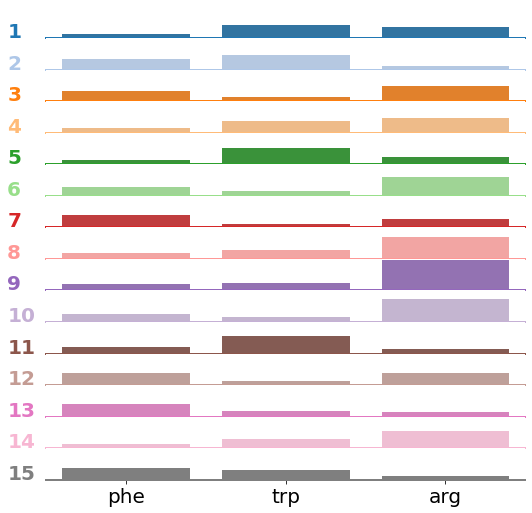

In [39]:
importlib.reload(caclust)
%matplotlib inline
cluster_cmap = 'tab20'
aa_cluster_mean_df = caclust.get_cluster_mean_df(aa_cluster_df)
fig = caclust.plot_cluster_tuning(aa_cluster_mean_df, cmap=cluster_cmap, hspace=0)
fig_dir = dtpar.fig_dir
#fig.savefig(os.path.join(fig_dir, f"aa_cluster_mean_{region}.svg"))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

6.0_arg-phe vs. 6.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:5.237e-01 U_stat=2.500e+01
7.0_arg-phe vs. 7.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.709e-01 U_stat=1.000e+01
8.0_arg-phe vs. 8.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.216e-01 U_stat=1.600e+01
9.0_arg-phe vs. 9.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:4.507e-02 U_stat=3.400e+01
10.0_arg-phe vs. 10.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:6.527e-02 U_stat=3.300e+01
11.0_arg-phe vs. 11.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:8.329e-01 U_stat=1.800e+01
12.0_arg-phe vs. 12.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:3.543e-01 U_stat=1.300e+01
13.0_arg-phe vs. 13.0_phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.709e-01 U_stat=1.000e+01
14.0_arg-ph

1.0_phe-arg vs. 1.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:8.300e-02 U_stat=6.000e+01
2.0_phe-arg vs. 2.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:6.965e-01 U_stat=4.500e+01
9.0_phe-arg vs. 9.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:7.897e-01 U_stat=4.350e+01
10.0_phe-arg vs. 10.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:9.654e-01 U_stat=3.900e+01
11.0_phe-arg vs. 11.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:8.286e-01 U_stat=4.300e+01
12.0_phe-arg vs. 12.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:2.370e-01 U_stat=2.600e+01
13.0_phe-arg vs. 13.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:5.453e-02 U_stat=1.800e+01
14.0_phe-arg vs. 14.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:5.726e-01 U_stat=4.700e+01
15.0_phe-arg vs. 15.0_naive: Mann-Whitney-Wilcoxon test two-sided, P_val:2.031e-01 U_stat=2.500e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 <

FileNotFoundError: [Errno 2] No such file or directory: '/media/hubo/WD_BoHu/BCE/Ca_imaging/results/JH_analysis/figures/aa_cluster_cont_Dp.svg'

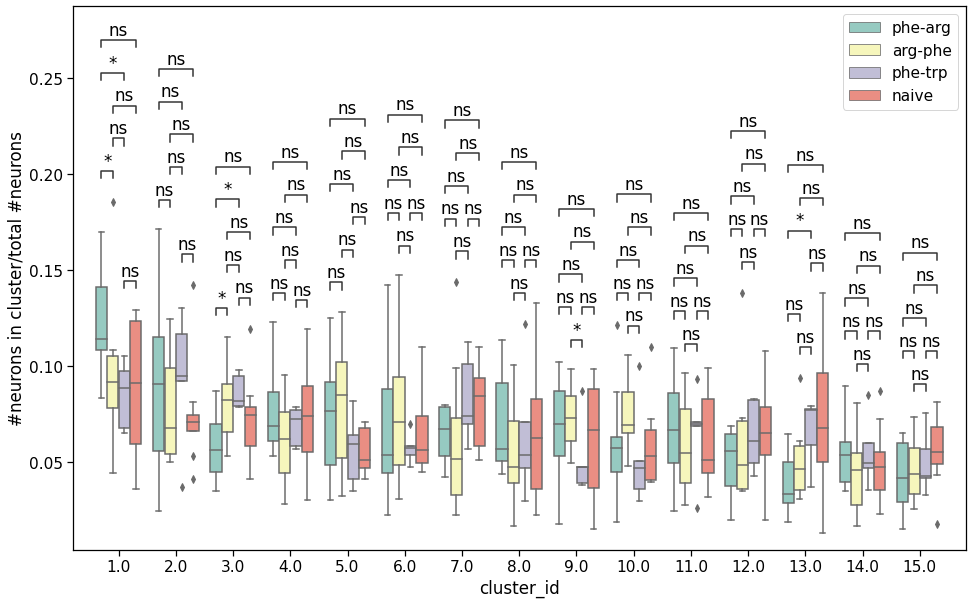

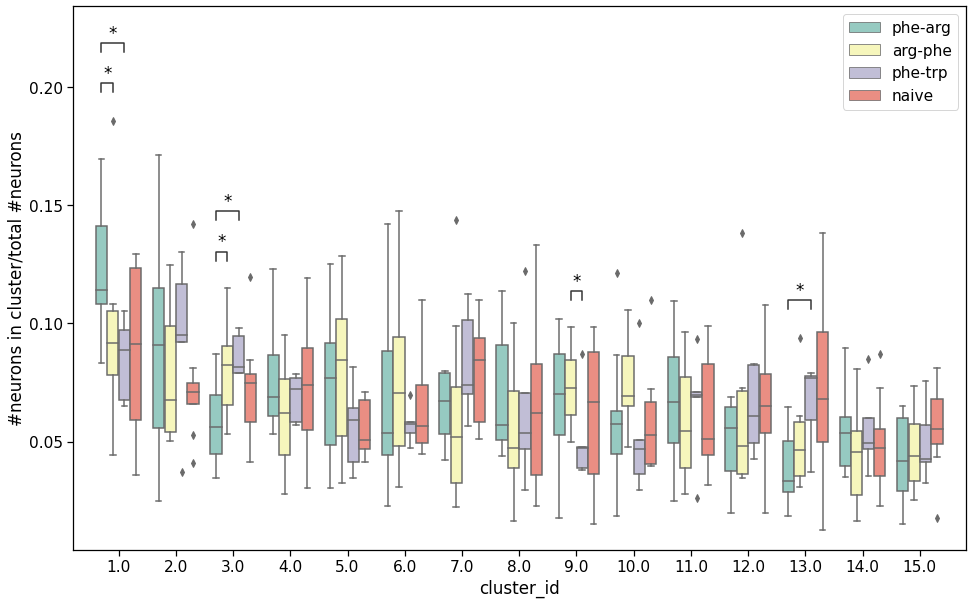

In [40]:
importlib.reload(caclust)
aa_cluster_nrn_df = caclust.get_cluster_nrn_df(aa_cluster_df)

aa_cluster_count_df = caclust.get_cluster_count_df(aa_cluster_nrn_df, dtpar.cond_list)

aa_cluster_ids = aa_cluster_count_df.cluster_id.unique()
all_pairs = caclust.get_all_cond_pairs(dtpar.cond_list, aa_cluster_ids)

#t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
test_method = 'Mann-Whitney'
annotator, fig1 = caclust.plot_cluster_cont_with_stat(aa_cluster_count_df, all_pairs,
                                                      dtpar.cond_list, test_method=test_method)

new_pairs = caclust.get_significant_pairs(annotator)
new_pairs

annotator2, fig2 = caclust.plot_cluster_cont_with_stat(aa_cluster_count_df, new_pairs,
                                                       dtpar.cond_list, test_method=test_method)
#fig2.savefig(os.path.join(fig_dir, f"aa_cluster_cont_{region}.svg"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

arg-phe vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:4.507e-02 U_stat=3.400e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

phe-arg vs. arg-phe: Mann-Whitney-Wilcoxon test two-sided, P_val:3.428e-02 U_stat=1.600e+01
phe-arg vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.265e-02 U_stat=5.000e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

phe-arg vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:1.931e-02 U_stat=6.000e+00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

phe-arg vs. arg-phe: Mann-Whitney-Wilcoxon test two-sided, P_val:3.670e-02 U_stat=6.400e+01
phe-arg vs. phe-trp: Mann-Whitney-Wilcoxon test two-sided, P_val:2.334e-02 U_stat=4.400e+01


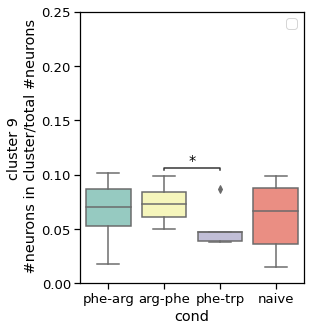

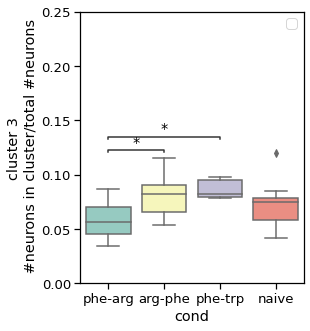

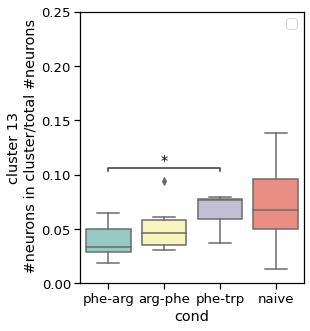

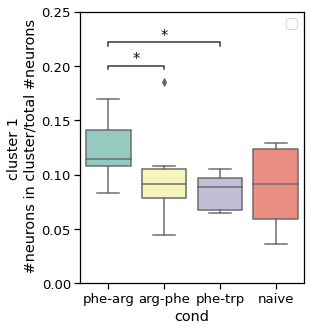

In [45]:
importlib.reload(caclust)
cluster_ids = set([x[0][0] for x in new_pairs])

# subset_cluster_count_df = cluster_count_df[cluster_count_df.cluster_id.isin(cluster_ids)] # choose subset of clusters for plotting


for cluster_id in cluster_ids:
    subset_cluster_count_df = aa_cluster_count_df[aa_cluster_count_df.cluster_id == cluster_id]
    pairs = [p for p in new_pairs if p[0][0] == cluster_id]
    annotator, fig = caclust.plot_single_cluster_cont_with_stat(subset_cluster_count_df, dtpar.cond_list,
                                                                 test_method=test_method, 
                                                                 figsize=(4,5), ylim=(0,0.25))

#fig2.savefig(os.path.join(fig_dir, f"cluster_cont_{region}_subset.svg"))

In [652]:
#cluster_df.to_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [653]:
#cluster_df = pd.read_pickle(os.path.join(dtpar.db_dir, 'cluster_df_{}.pkl'.format(region)))

In [720]:
aa_cluster_df.groupby('cluster_id').size()

cluster_id
1.0     753
2.0     702
3.0     702
4.0     681
5.0     632
6.0     623
7.0     620
8.0     614
9.0     596
10.0    592
11.0    574
12.0    545
13.0    471
dtype: int64

In [722]:
aa_cluster_df.groupby(['cond','cluster_id']).size()

cond     cluster_id
arg-phe  1.0           235
         2.0           205
         3.0           220
         4.0           168
         5.0           193
         6.0           143
         7.0           210
         8.0           167
         9.0           151
         10.0          136
         11.0          148
         12.0          182
         13.0          137
naive    1.0           141
         2.0           152
         3.0           148
         4.0           150
         5.0           133
         6.0           146
         7.0           143
         8.0           118
         9.0           114
         10.0          140
         11.0          120
         12.0          121
         13.0           90
phe-arg  1.0           266
         2.0           209
         3.0           237
         4.0           237
         5.0           173
         6.0           248
         7.0           178
         8.0           238
         9.0           214
         10.0          203
        